In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
from preprocessing import*
from model.convolutional_neural_network import *
from model.Executor import *
import warnings  
warnings.filterwarnings("ignore")

# Training Data

The statistics on the size of our dataset.

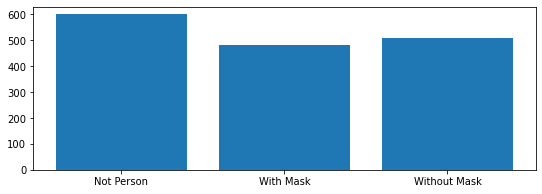

In [2]:
names = ['Not Person', 'With Mask', 'Without Mask']
N = []
N.append(len(os.listdir("./dataset/NotPerson")))
N.append(len(os.listdir("./dataset/WithMask")))
N.append(len(os.listdir("./dataset/WithoutMask")))
plt.figure(figsize=(9, 3))
plt.bar(names, N)
plt.show()

Create datasets for training and testing the model.

In [3]:
dataset = load_data("./dataset")
tr_ds, te_ds = split_data(dataset)
tr_loader = train_dataloarder(tr_ds)
te_loader = test_dataloarder(te_ds)

# Deep Learning

Implementing and training the CNN model.

In [4]:
num_epochs = 20
exec_obj = Executor()
all_loss,iter_loss,accuracy = exec_obj.training_model_executor(
    tr_loader,
    num_epochs
)


  0/20... rate=0 Hz, eta=?, total=0:00:00, wall=15:51 EST
current iter acc: 79.0620
current iter loss: 82.2359
  1/20... rate=0.03 Hz, eta=0:09:04, total=0:00:28, wall=15:51 EST
current iter acc: 91.6248
current iter loss: 67.6750
  2/20... rate=0.04 Hz, eta=0:08:06, total=0:00:54, wall=15:52 EST
current iter acc: 91.5410
current iter loss: 56.9550
  3/20... rate=0.04 Hz, eta=0:07:40, total=0:01:21, wall=15:52 EST
current iter acc: 89.7822
current iter loss: 54.3991
  4/20... rate=0.04 Hz, eta=0:07:03, total=0:01:45, wall=15:52 EST
current iter acc: 94.3886
current iter loss: 48.9468
  5/20... rate=0.04 Hz, eta=0:06:34, total=0:02:11, wall=15:53 EST
current iter acc: 94.7236
current iter loss: 44.8608
  6/20... rate=0.04 Hz, eta=0:06:07, total=0:02:37, wall=15:53 EST
current iter acc: 93.8861
current iter loss: 41.3534
  7/20... rate=0.04 Hz, eta=0:05:47, total=0:03:07, wall=15:54 EST
current iter acc: 95.8961
current iter loss: 38.0665
  8/20... rate=0.04 Hz, eta=0:05:22, total=0:03:3

In [5]:
testdata_accuracy = exec_obj.calculate_model_accuracy(te_loader)
print("Model accuracy for test dataset :",testdata_accuracy)

Model accuracy for test dataset : 95.47738693467338


# Evaluation

Confusion matrix.

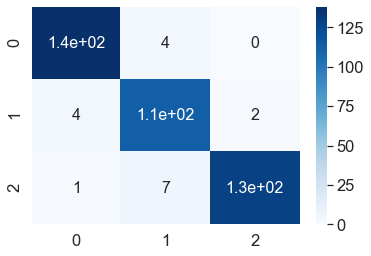

In [6]:
calc_model_weights, actual_results = next(iter(te_loader))
model_net = exec_obj.network(calc_model_weights)
pred_vals = torch.argmax(model_net, dim = 1)

sb.set(font_scale=1.5) 
sb.heatmap(
    confusion_matrix(actual_results.numpy(),pred_vals.numpy()),
    annot=True,
    annot_kws={"size": 16},
    cmap="Blues"
)  
plt.show()

Creating a table of results in order to show the accuracy, precision, recall and f1-score.

In [7]:
report = classification_report(
    actual_results.numpy(),
    pred_vals.numpy(), 
    target_names=['with mask','without mask','not a person']
)
print(report)  

              precision    recall  f1-score   support

   with mask       0.97      0.97      0.97       142
without mask       0.91      0.95      0.93       119
not a person       0.98      0.94      0.96       137

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.96      0.95      0.95       398

